In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

# Randomization
import random


In [2]:
# Load and check data

dataframeA = pd.read_csv('5. Dataset Feature Dropping/MeterA_featureSelection.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

featuresVector = dataframeA[['Flatness ratio','Symmetry','Crossflow','Average speed of sound','Average Gain']].to_numpy()

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']].to_numpy()
yLbl=yLbl.reshape(-1)

#featuresVector
# featuresVector

In [3]:
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(featuresVector) 

Text(0.5, 1.0, 'Plot of data:Feature 1 verus Feature 2')

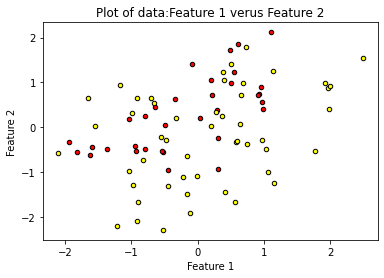

In [4]:
reds = yLbl == 1
black = yLbl == 2
plt.scatter(scaled_data[reds, 2], scaled_data[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(scaled_data[black, 2], scaled_data[black, 1], c="yellow", s=20, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot of data:Feature 1 verus Feature 2")

In [5]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(scaled_data)

PCA()

[0.48637736 0.29033473 0.10687912 0.07700762 0.03940117]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

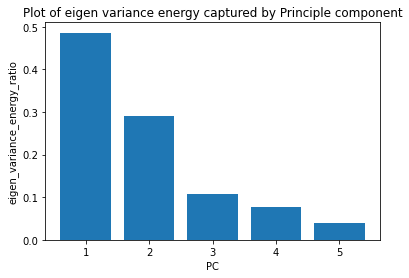

In [6]:
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy)
plt.bar(range(1,6), eigen_energy, alpha=1, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

In [7]:
pca = PCA(n_components=5)
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)
print(pca_features)
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)

[[ 3.26014147e+00 -2.01905250e+00 -5.00832662e-01  3.76385734e-01
   1.06491049e+00]
 [ 2.52289714e+00 -1.18366831e+00  1.04886121e+00  2.30119197e-01
   3.00215403e-01]
 [ 1.41724264e+00 -1.04765601e+00  1.41968760e+00 -3.03846116e-01
   1.39723594e-01]
 [ 1.70745201e-01 -1.35167023e+00 -2.20118584e-01 -7.06671016e-02
   7.10835581e-02]
 [-3.48873283e-03 -1.33776494e+00 -8.56443036e-01  4.97518181e-01
   2.46717079e-01]
 [ 3.00850957e-01 -1.17087496e+00 -1.14077938e+00  6.48804266e-01
   9.29043973e-02]
 [ 7.70431204e-01 -9.91715994e-01 -6.48096844e-01  8.89064989e-01
  -1.40348320e-01]
 [ 4.92670989e-01 -1.20459024e+00 -5.59117654e-01  2.29492550e-01
  -1.19128728e-01]
 [ 1.31548865e+00 -9.49042847e-01 -1.02296120e+00  8.43504290e-01
  -4.74105448e-01]
 [-3.92158433e-01 -7.16670560e-01 -2.30567695e-01  4.75296065e-01
   6.09471962e-02]
 [-1.41653903e+00 -9.34424763e-01 -2.06226902e-01  1.34562815e-01
   2.15048660e-03]
 [-1.41649160e+00 -7.23959405e-01 -4.16307450e-01 -8.34117138e-02

In [8]:
X_pca_all_back=pca.inverse_transform(pca_features)
print(X_pca_all_back)

[[ 9.61066975e-01 -5.51762461e-01 -1.82472234e+00  8.20842688e-01
   3.31664642e+00]
 [ 1.00279448e+00 -9.44065718e-01 -4.49788945e-01  1.62301423e+00
   2.06783279e+00]
 [ 9.18002910e-01 -2.30339135e-01  3.12573796e-01  1.59759866e+00
   1.29911838e+00]
 [ 9.39969374e-01  6.38158100e-01 -3.48063876e-01 -9.00073528e-02
   7.03297428e-01]
 [ 8.97738692e-01  4.58710041e-01 -6.39313257e-01 -9.06435894e-01
   7.64734199e-01]
 [ 8.16830518e-01  1.79974226e-01 -1.04194064e+00 -9.31314323e-01
   7.34728356e-01]
 [ 9.63591056e-01 -4.25745441e-01 -9.43099823e-01 -4.74750534e-01
   7.63306183e-01]
 [ 9.28727837e-01  2.58338819e-01 -8.02344488e-01 -2.12027886e-01
   6.74719610e-01]
 [ 9.70711819e-01 -6.16911430e-01 -1.62938418e+00 -2.62100353e-01
   7.53304214e-01]
 [ 6.50206825e-01  2.04492052e-01  3.05795431e-02 -6.70456495e-01
   1.87494974e-01]
 [ 7.76002023e-01  9.89829368e-01  5.06549442e-01 -1.00294526e+00
  -3.09743323e-01]
 [ 6.85200695e-01  1.04419491e+00  2.01281563e-01 -8.61358535e-01

In [9]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[8.41498715e-01 1.00936653e+00 9.93816009e-01 1.48539123e+03
  3.50641895e+01]
 [8.42250216e-01 1.00658369e+00 9.96605206e-01 1.48591990e+03
  3.49752808e+01]
 [8.40723143e-01 1.01164657e+00 9.98151739e-01 1.48590315e+03
  3.49205526e+01]
 [8.41118753e-01 1.01780731e+00 9.96811566e-01 1.48479094e+03
  3.48781334e+01]
 [8.40358190e-01 1.01653439e+00 9.96220736e-01 1.48425287e+03
  3.48825074e+01]
 [8.38901056e-01 1.01455715e+00 9.95403964e-01 1.48423648e+03
  3.48803711e+01]
 [8.41544173e-01 1.01026044e+00 9.95604473e-01 1.48453738e+03
  3.48824057e+01]
 [8.40916296e-01 1.01511304e+00 9.95890010e-01 1.48471052e+03
  3.48760989e+01]
 [8.41672416e-01 1.00890439e+00 9.94212273e-01 1.48467752e+03
  3.48816936e+01]
 [8.35900209e-01 1.01473107e+00 9.97579684e-01 1.48440840e+03
  3.48414111e+01]
 [8.38165746e-01 1.02030192e+00 9.98545239e-01 1.48418927e+03
  3.48060105e+01]
 [8.36530439e-01 1.02068757e+00 9.97925971e-01 1.48428258e+03
  3.47762041e+01]
 [8.33182062e-01 1.01601228e+00 9.980966